# Introduction of the dataset

In [141]:
#Importing Data 
#Understanding Data Types
#Descriptive Statistics
#Univariate Analysis
#Data Scaling and Transformation
#Bivariate and Multivariate Analysis
#Missing Value Treatment
#Outlier Analysis
#Train-Test Split


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_excel("storedata_total.xlsx")
df.head()

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,6H6T6N,0,2012-09-28,2013-08-11 00:00:00,2013-08-11 00:00:00,29,100.000000,3.448276,14.52,0.000000,0,0,0,Monday,DEL
1,APCENR,1,2010-12-19,2011-04-01 00:00:00,2014-01-19 00:00:00,95,92.631579,10.526316,83.69,0.181641,1,1,1,Friday,DEL
2,7UP6MS,0,2010-10-03,2010-12-01 00:00:00,2011-07-06 00:00:00,0,0.000000,0.000000,33.58,0.059908,0,0,0,Wednesday,DEL
3,7ZEW8G,0,2010-10-22,2011-03-28 00:00:00,2011-03-28 00:00:00,0,0.000000,0.000000,54.96,0.000000,0,0,0,Thursday,BOM
4,8V726M,1,2010-11-27,2010-11-29 00:00:00,2013-01-28 00:00:00,30,90.000000,13.333333,111.91,0.008850,0,0,0,Monday,BOM


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='retained', ylabel='count'>

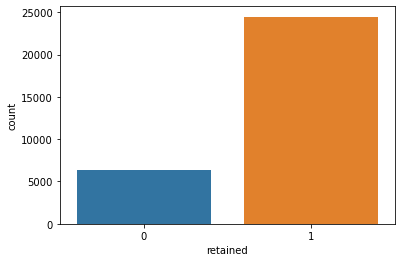

In [15]:
sns.countplot(df["retained"])

In [3]:
!pip install imblearn

In [ ]:
#conda install -c glemaitre imbalanced -learn

In [17]:
df=df.set_index(["custid"])

In [18]:
df["favday"]=pd.get_dummies(df["favday"],drop_first=True)
df["city"]=pd.get_dummies(df["city"],drop_first=True)

In [26]:
x=df.drop(["retained","created","firstorder","lastorder"],axis=1)
y=df["retained"]
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='auto',random_state=5)
sm.fit_resample(x,y)

(       esent   eopenrate  eclickrate    avgorder   ordfreq  paperless  refill  \
 0         29  100.000000    3.448276   14.520000  0.000000          0       0   
 1         95   92.631579   10.526316   83.690000  0.181641          1       1   
 2          0    0.000000    0.000000   33.580000  0.059908          0       0   
 3          0    0.000000    0.000000   54.960000  0.000000          0       0   
 4         30   90.000000   13.333333  111.910000  0.008850          0       0   
 ...      ...         ...         ...         ...       ...        ...     ...   
 48939      3   50.000000    0.000000   82.127183  0.001600          0       0   
 48940      0    0.000000    0.000000   37.230531  0.000000          0       0   
 48941      0    0.000000    0.000000   51.873657  0.017511          0       0   
 48942      0    0.000000    0.000000  199.553331  0.003170          0       0   
 48943      0    0.000000    0.000000   44.596102  0.911296          1       0   
 
        doorst

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='retained', ylabel='count'>

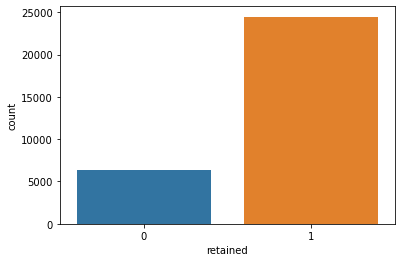

In [27]:
sns.countplot(y)

In [24]:
import collections
collections.Counter(y)

Counter({0: 6329, 1: 24472})

In [2]:
df.dtypes

custid                object
retained               int64
created       datetime64[ns]
firstorder            object
lastorder             object
esent                  int64
eopenrate            float64
eclickrate           float64
avgorder             float64
ordfreq              float64
paperless              int64
refill                 int64
doorstep               int64
favday                object
city                  object
dtype: object

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30801 entries, 0 to 30800
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   custid      30781 non-null  object        
 1   retained    30801 non-null  int64         
 2   created     30781 non-null  datetime64[ns]
 3   firstorder  30781 non-null  object        
 4   lastorder   30781 non-null  object        
 5   esent       30801 non-null  int64         
 6   eopenrate   30801 non-null  float64       
 7   eclickrate  30801 non-null  float64       
 8   avgorder    30801 non-null  float64       
 9   ordfreq     30801 non-null  float64       
 10  paperless   30801 non-null  int64         
 11  refill      30801 non-null  int64         
 12  doorstep    30801 non-null  int64         
 13  favday      30801 non-null  object        
 14  city        30801 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 3.

In [114]:
df.describe()

,retained,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep
count,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000,30801.000000
mean,0.794520,28.138405,25.554838,5.671139,61.873944,0.037729,0.649037,0.095094,0.038895
std,0.404059,16.751380,29.557106,10.561704,41.007588,0.103932,0.477279,0.293350,0.193347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,16.000000,2.040816,0.000000,40.020000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,32.000000,13.207547,0.000000,50.970000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,42.000000,40.000000,7.142857,74.280000,0.040816,1.000000,0.000000,0.000000
max,1.000000,291.000000,100.000000,100.000000,2600.140000,3.250000,1.000000,1.000000,1.000000


# Removal of Null values

In [143]:
df.isnull().sum()

custid        20
retained       0
created       20
firstorder    20
lastorder     20
esent          0
eopenrate      0
eclickrate     0
avgorder       0
ordfreq        0
paperless      0
refill         0
doorstep       0
favday         0
city           0
dtype: int64

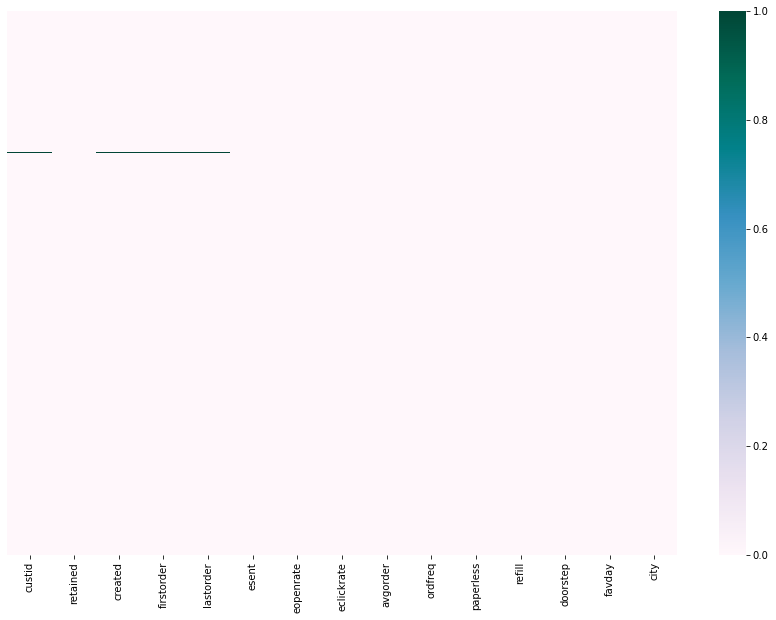

In [144]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),cmap='PuBuGn',yticklabels=False);

In [145]:
df.dropna(inplace=True)

In [146]:
df.isnull().sum()

custid        0
retained      0
created       0
firstorder    0
lastorder     0
esent         0
eopenrate     0
eclickrate    0
avgorder      0
ordfreq       0
paperless     0
refill        0
doorstep      0
favday        0
city          0
dtype: int64

# Formatting of the data

In [147]:
df[df["firstorder"]=="1/0/00"]["custid"].count()

12

In [148]:
df[df["lastorder"]=="1/0/00"]["custid"].count()

23

In [149]:
df[(df["firstorder"]=="1/0/00") | (df["lastorder"]=="1/0/00")]["custid"].count()

23

In [150]:
df[(df["firstorder"]=="1/0/00") | (df["lastorder"]=="1/0/00")]["custid"].index

Int64Index([ 1180,  4825,  4883,  5214,  5628,  9137, 11428, 15063, 15236,
            15460, 15659, 15745, 15799, 16365, 16579, 16681, 16839, 16994,
            17553, 18434, 18572, 18593, 23450],
           dtype='int64')

In [151]:
df[df["lastorder"]=="1/0/00"]=np.nan

In [152]:
df["lastorder"].fillna(df["firstorder"])

0        2013-08-11 00:00:00
1        2014-01-19 00:00:00
2        2011-07-06 00:00:00
3        2011-03-28 00:00:00
4        2013-01-28 00:00:00
                ...         
30796    2018-01-17 00:00:00
30797    2018-01-17 00:00:00
30798    2018-01-21 00:00:00
30799    2018-01-17 00:00:00
30800    2018-01-17 00:00:00
Name: lastorder, Length: 30781, dtype: object

In [153]:
df[df["firstorder"]=="1/0/00"]=np.nan
df["firstorder"].fillna(df["created"])

0        2013-08-11 00:00:00
1        2011-04-01 00:00:00
2        2010-12-01 00:00:00
3        2011-03-28 00:00:00
4        2010-11-29 00:00:00
                ...         
30796    2018-01-17 00:00:00
30797    2018-01-17 00:00:00
30798    2018-01-17 00:00:00
30799    2018-01-17 00:00:00
30800    2018-01-17 00:00:00
Name: firstorder, Length: 30781, dtype: object

In [98]:
df.dtypes

custid                object
retained             float64
created       datetime64[ns]
firstorder            object
lastorder             object
esent                float64
eopenrate            float64
eclickrate           float64
avgorder             float64
ordfreq              float64
paperless            float64
refill               float64
doorstep             float64
favday                object
city                  object
dtype: object

In [99]:
df[(df["firstorder"]=="1/0/00") | (df["lastorder"]=="1/0/00")]["custid"].index

Int64Index([], dtype='int64')

# Scaling and Transformation

In [106]:
df.columns

Index(['custid', 'retained', 'created', 'firstorder', 'lastorder', 'esent',
       'eopenrate', 'eclickrate', 'avgorder', 'ordfreq', 'paperless', 'refill',
       'doorstep', 'favday', 'city'],
      dtype='object')

In [154]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df["esent"]=ss.fit_transform(df[["esent"]])
df["eclickrate"]=ss.fit_transform(df[["eclickrate"]])
df["eopenrate"]=ss.fit_transform(df[["eopenrate"]])
df["avgorder"]=ss.fit_transform(df[["avgorder"]])
df["ordfreq"]=ss.fit_transform(df[["ordfreq"]])

In [164]:
from sklearn.preprocessing import OneHotEncoder
oe=OneHotEncoder
df["favday"]=oe.fit_transform(df[["favday"]])

TypeError: fit_transform() missing 1 required positional argument: 'X'

In [161]:
df.head()

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,6H6T6N,0.0,2012-09-28,2013-08-11 00:00:00,2013-08-11 00:00:00,0.051619,2.518722,-0.210723,-1.155703,-0.363179,0.0,0.0,0.0,Monday,DEL
1,APCENR,1.0,2010-12-19,2011-04-01 00:00:00,2014-01-19 00:00:00,3.991648,2.269419,0.459184,0.533347,1.383645,1.0,1.0,1.0,Friday,DEL
2,7UP6MS,0.0,2010-10-03,2010-12-01 00:00:00,2011-07-06 00:00:00,-1.679605,-0.864677,-0.537087,-0.690280,0.212950,0.0,0.0,0.0,Wednesday,DEL
3,7ZEW8G,0.0,2010-10-22,2011-03-28 00:00:00,2011-03-28 00:00:00,-1.679605,-0.864677,-0.537087,-0.168206,-0.363179,0.0,0.0,0.0,Thursday,BOM
4,8V726M,1.0,2010-11-27,2010-11-29 00:00:00,2013-01-28 00:00:00,0.111317,2.180382,0.724856,1.222446,-0.278073,0.0,0.0,0.0,Monday,BOM


# Univariate Analysis

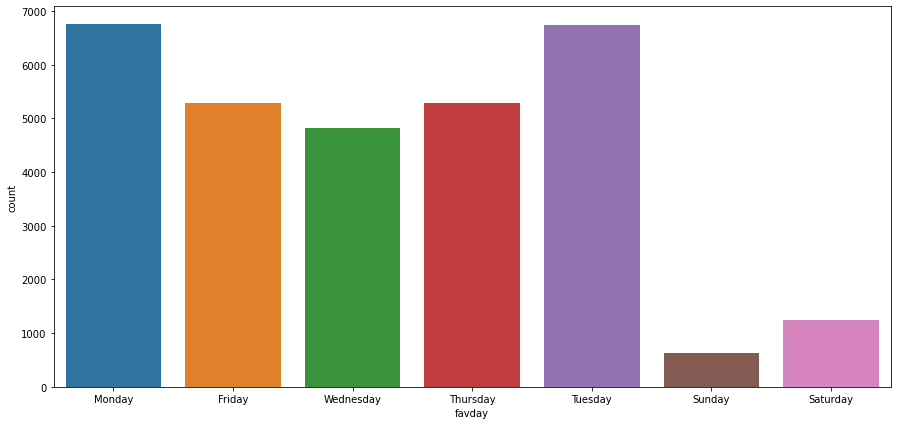

In [15]:
plt.figure(figsize=(15,7))
sns.countplot(x = df.favday)
plt.show()

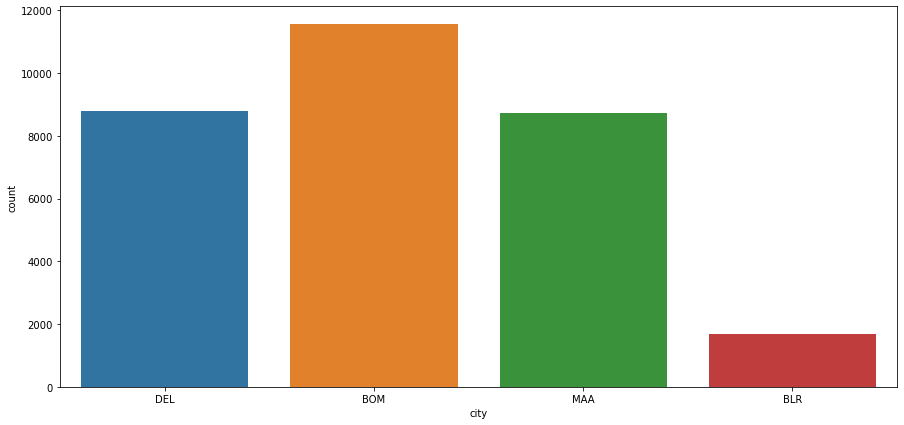

In [16]:
plt.figure(figsize=(15,7))
sns.countplot(x = df.city)
plt.show()

# Bivariate Analysis

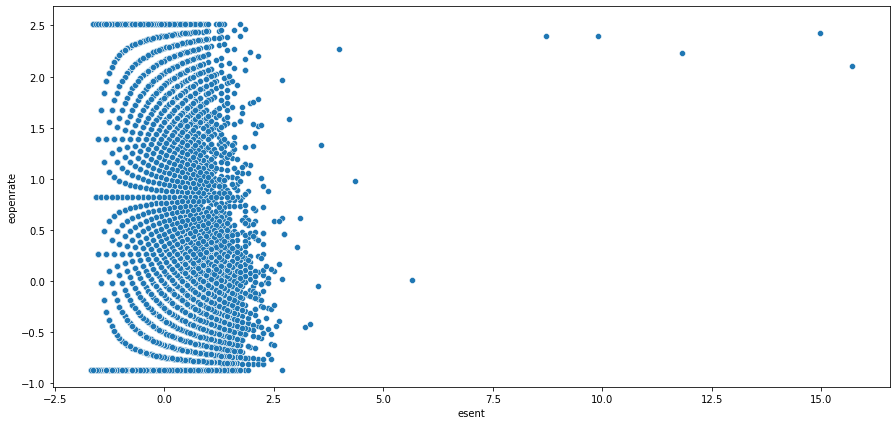

In [108]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= df.esent, y = df.eopenrate)
plt.show()

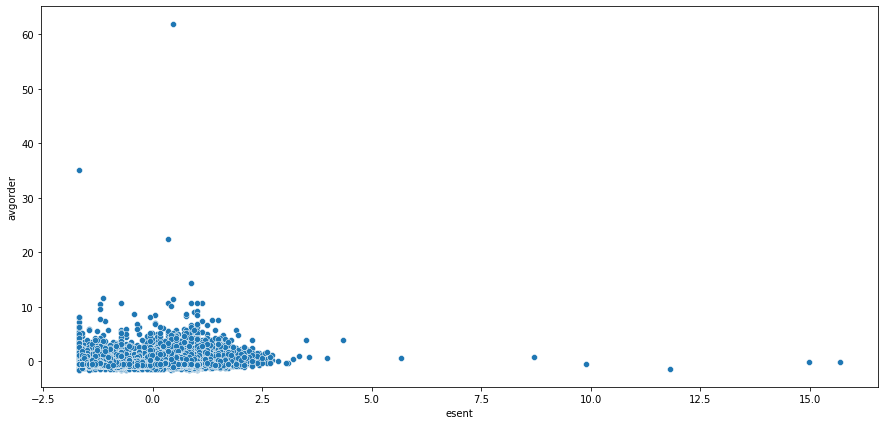

In [109]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= df.esent, y = df.avgorder)
plt.show()

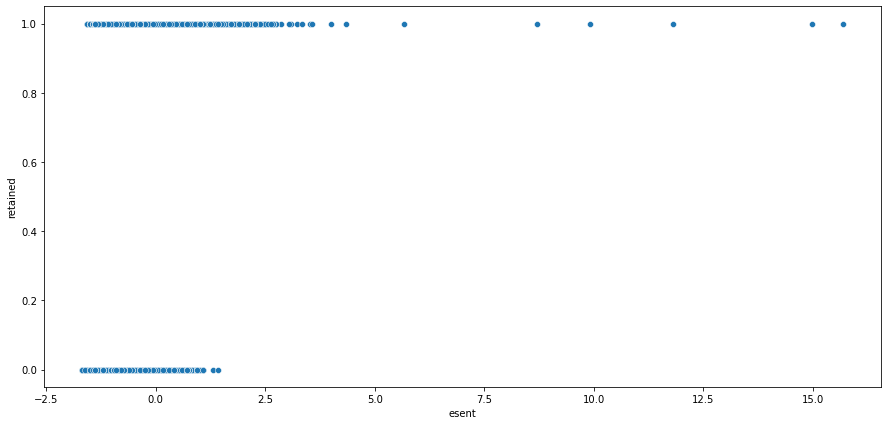

In [110]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= df.esent, y = df.retained)
plt.show()

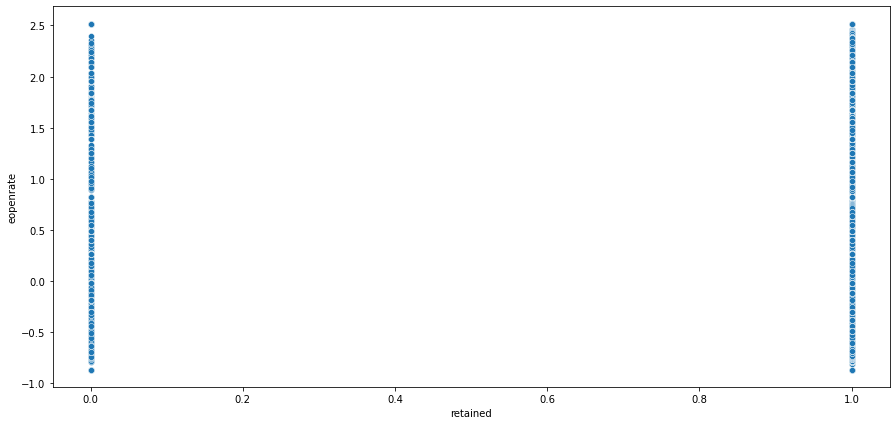

In [111]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= df.retained, y = df.eopenrate)
plt.show()

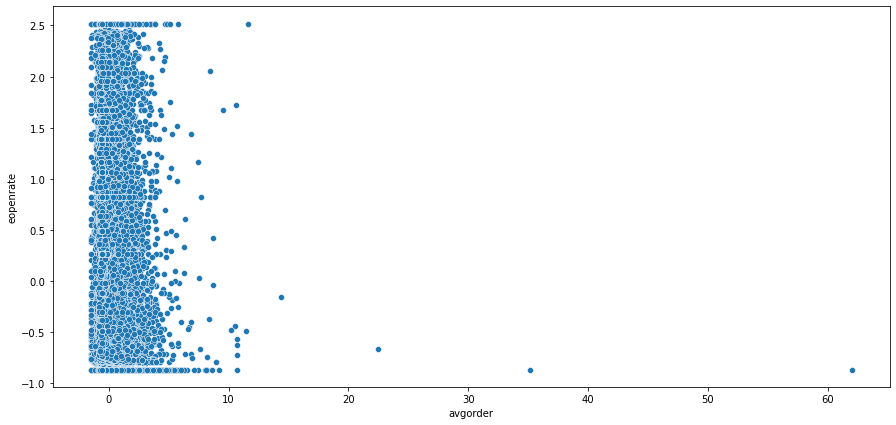

In [112]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= df.avgorder, y = df.eopenrate)
plt.show()

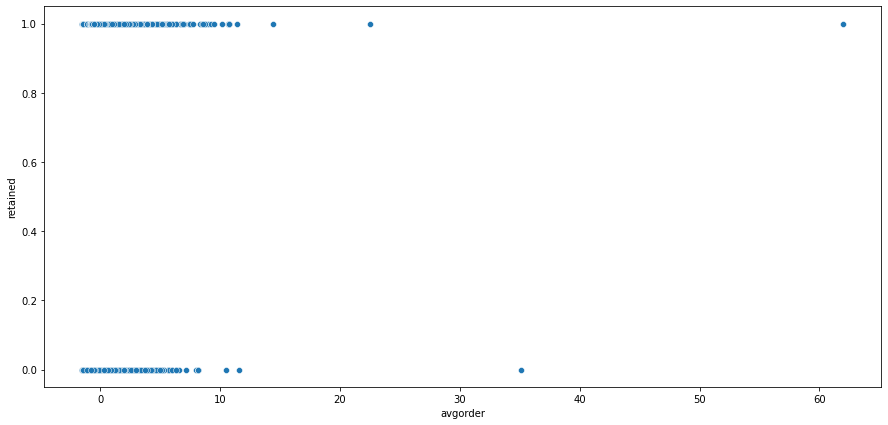

In [113]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= df.avgorder, y = df.retained)
plt.show()

favday
Friday       AxesSubplot(0.125,0.125;0.775x0.755)
Monday       AxesSubplot(0.125,0.125;0.775x0.755)
Saturday     AxesSubplot(0.125,0.125;0.775x0.755)
Sunday       AxesSubplot(0.125,0.125;0.775x0.755)
Thursday     AxesSubplot(0.125,0.125;0.775x0.755)
Tuesday      AxesSubplot(0.125,0.125;0.775x0.755)
Wednesday    AxesSubplot(0.125,0.125;0.775x0.755)
Name: avgorder, dtype: object

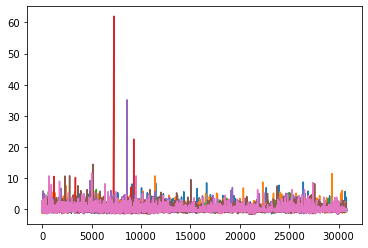

In [114]:
df.groupby("favday")["avgorder"].plot()

city
BLR    AxesSubplot(0.125,0.125;0.775x0.755)
BOM    AxesSubplot(0.125,0.125;0.775x0.755)
DEL    AxesSubplot(0.125,0.125;0.775x0.755)
MAA    AxesSubplot(0.125,0.125;0.775x0.755)
Name: avgorder, dtype: object

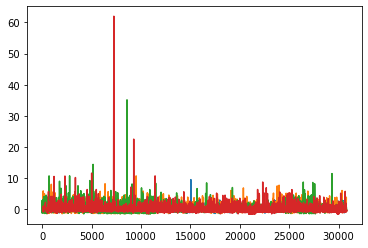

In [115]:
df.groupby("city")["avgorder"].plot()

# Multivariate Analysis

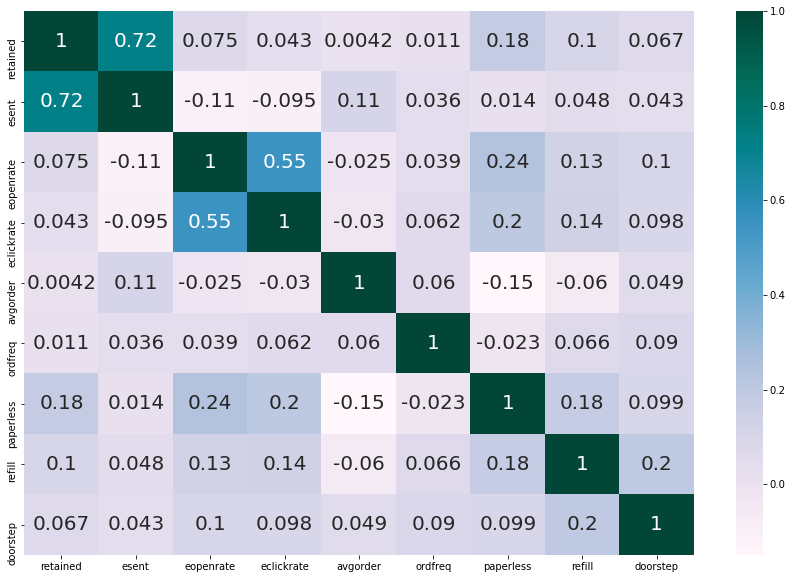

In [116]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='PuBuGn',annot=True,annot_kws={'size':20})
plt.show()

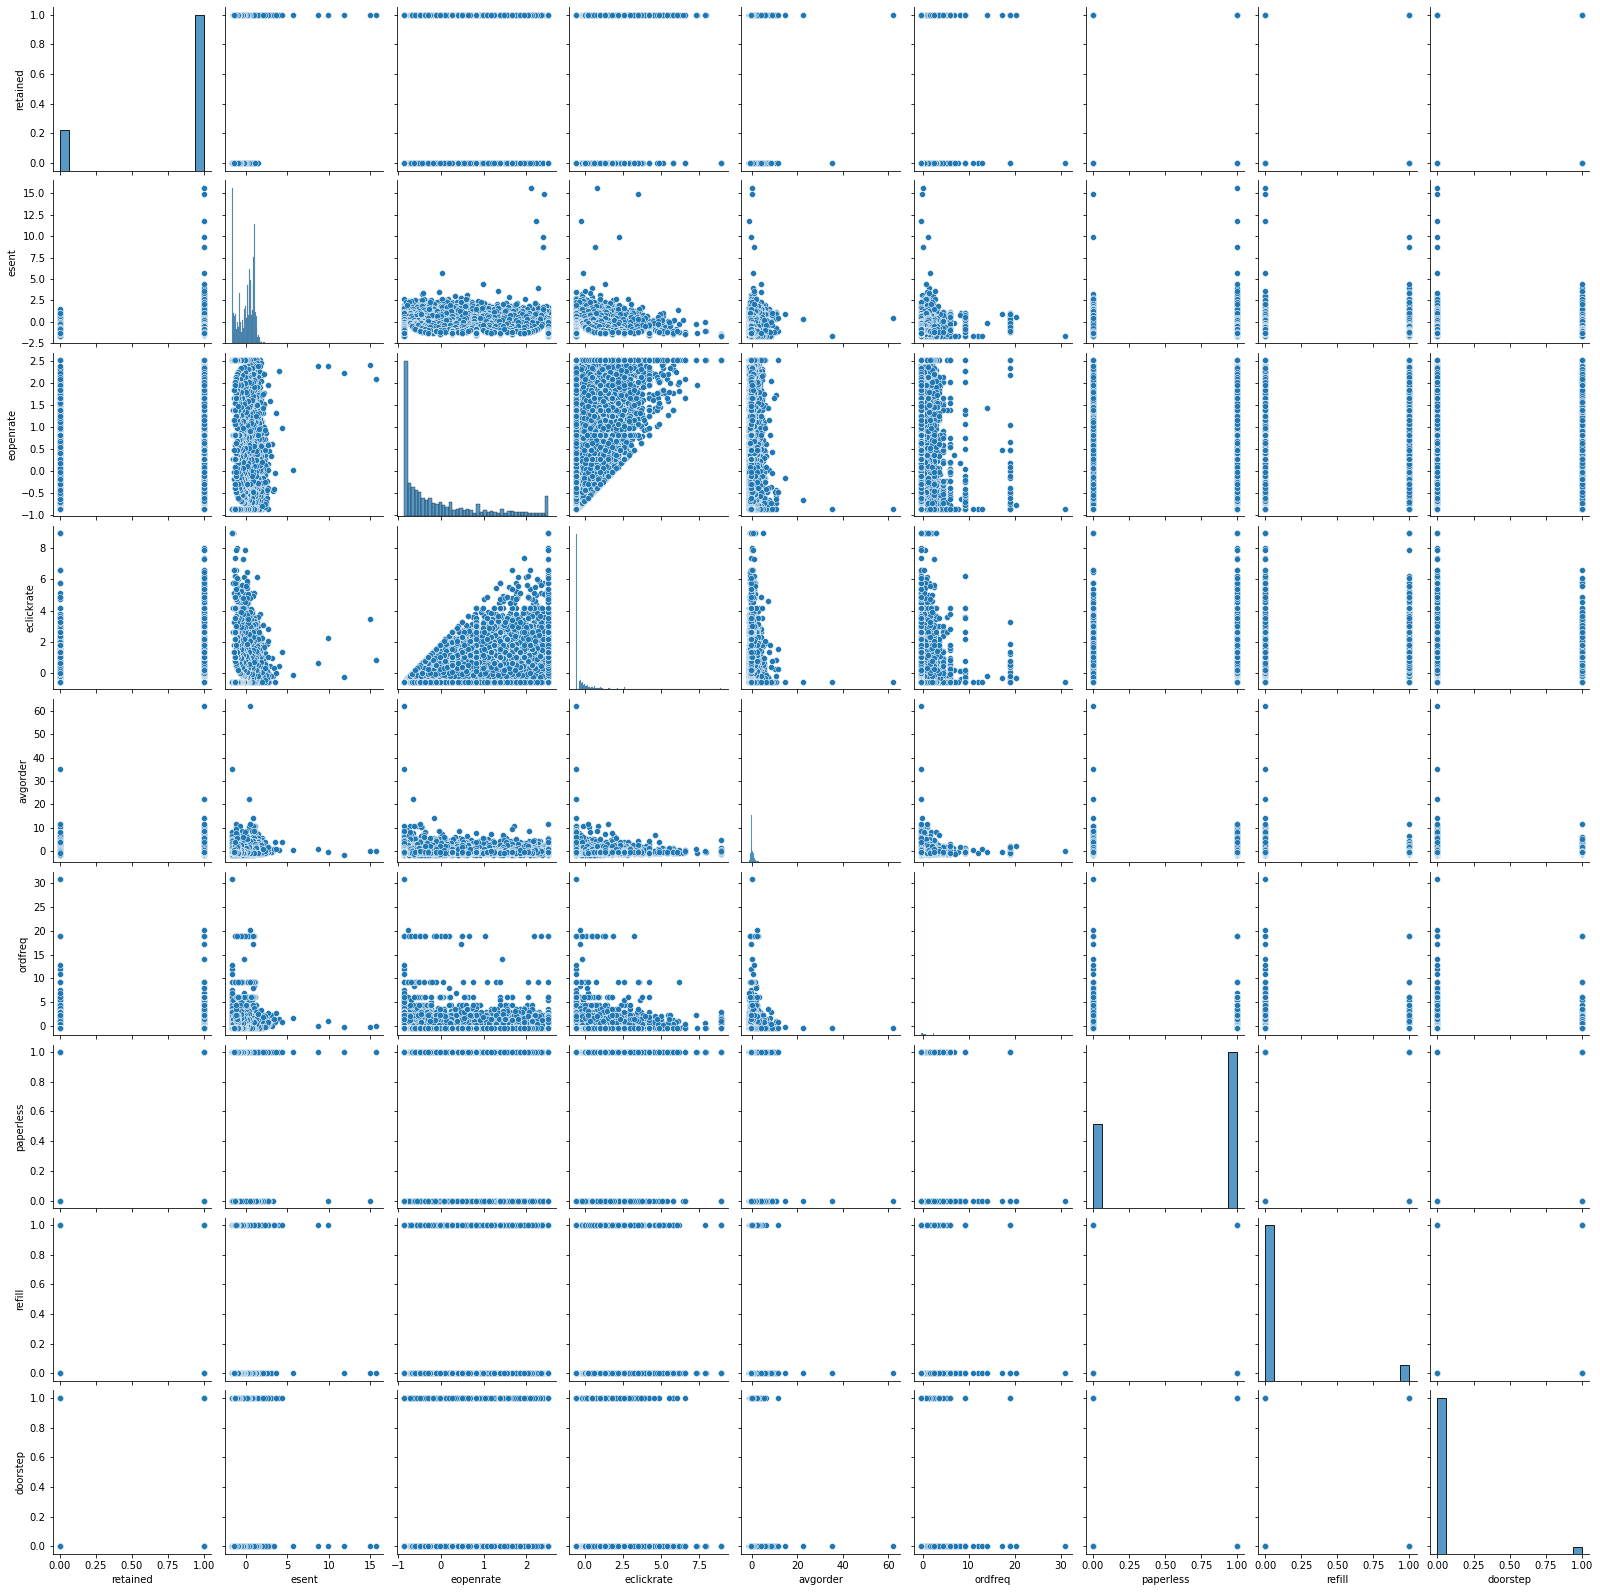

In [117]:
sns.pairplot(df)

# Outlier Treatment

array([[<AxesSubplot:title={'center':'retained'}>,
        <AxesSubplot:title={'center':'esent'}>,
        <AxesSubplot:title={'center':'eopenrate'}>],
       [<AxesSubplot:title={'center':'eclickrate'}>,
        <AxesSubplot:title={'center':'avgorder'}>,
        <AxesSubplot:title={'center':'ordfreq'}>],
       [<AxesSubplot:title={'center':'paperless'}>,
        <AxesSubplot:title={'center':'refill'}>,
        <AxesSubplot:title={'center':'doorstep'}>]], dtype=object)

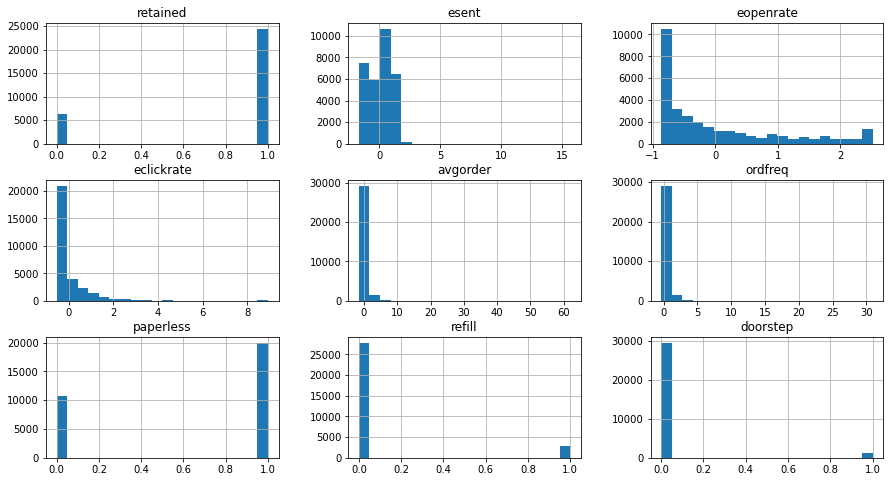

In [118]:
df.hist(bins=20,figsize=(15,8))

C:\Users\HF4\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ordfreq', ylabel='Density'>

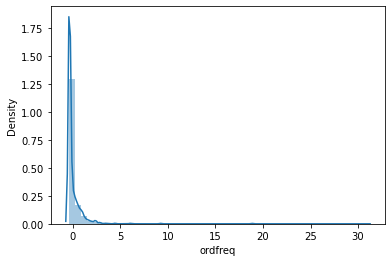

In [122]:
sns.distplot(df["ordfreq"])
#ordfreq-outlier treatment

In [ ]:
#As per the dataset the retained,refill,doorstep and paperless are boolean values so they don't need outlier treatment
#esent,eopenrate,eclickrate,avgorder are numerical and has been skewed so the outliers are replace with the median

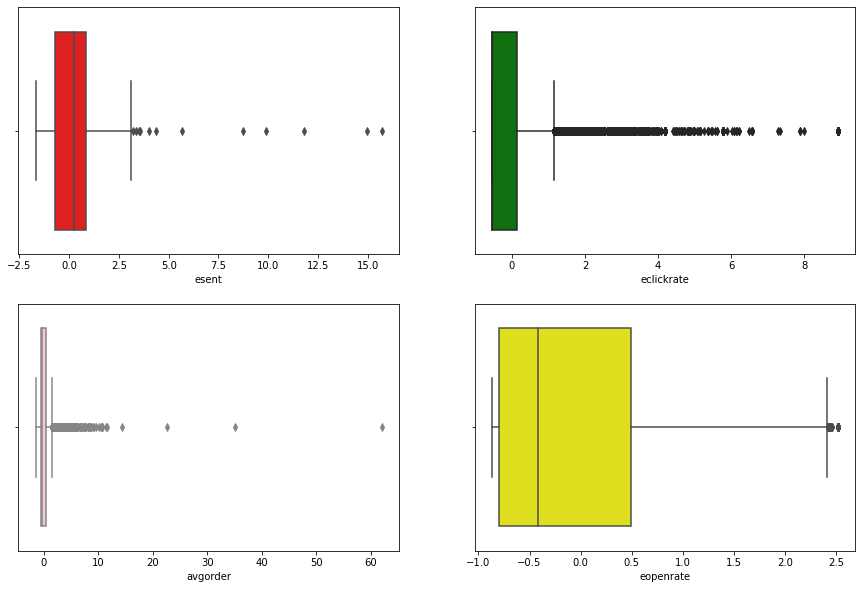

In [124]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x = df.esent,color='red');
plt.subplot(2,2,2)
sns.boxplot(x = df.eclickrate,color='green')
plt.subplot(2,2,3)
sns.boxplot(x = df.avgorder,color='pink')
plt.subplot(2,2,4)
sns.boxplot(x = df.eopenrate,color='yellow')
plt.show()

In [121]:
#Since the all the attributes are skewed we use IQR method to detect outliers
#Since there are more number of outliers  we consider tham as missing values and replace them with medians

In [125]:
q1=df["esent"].quantile(0.25)
q3=df["esent"].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
esentout=df[(df["esent"]<lb) | (df["esent"]>ub)]
esentout

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
1,APCENR,1.0,2010-12-19,2011-04-01 00:00:00,2014-01-19 00:00:00,3.991648,2.269419,0.459184,0.533347,1.383645,1.0,1.0,1.0,Friday,DEL
311,R6QJPU,1.0,2008-08-28,2009-04-20 00:00:00,2014-01-19 00:00:00,3.514069,-0.047994,-0.537087,3.945877,0.911687,1.0,1.0,1.0,Monday,DEL
2022,C9HHMU,1.0,2010-07-09,2011-05-11 00:00:00,2013-04-16 00:00:00,11.812009,2.234277,-0.243937,-1.459473,-0.240584,1.0,0.0,0.0,Thursday,BOM
2604,CDFMKL,1.0,2013-06-14,2013-06-26 00:00:00,2014-01-05 00:00:00,4.349833,0.977768,1.337086,3.966877,0.782879,1.0,1.0,1.0,Monday,BOM
3765,ZMWTHU,1.0,2013-04-15,2013-05-15 00:00:00,2014-01-13 00:00:00,3.215582,-0.452067,-0.190822,0.412229,1.378157,0.0,1.0,0.0,Tuesday,BOM
4901,4MHTA2,1.0,2010-08-18,2010-08-18 00:00:00,2014-01-07 00:00:00,14.975971,2.421707,3.499775,-0.074926,-0.161208,0.0,0.0,0.0,Friday,BOM
13035,JU3ZSH,1.0,2013-09-10,2013-09-10 00:00:00,2014-01-16 00:00:00,9.901692,2.396640,2.243742,-0.505430,1.139466,0.0,1.0,0.0,Wednesday,DEL
21416,BP5HFJ,1.0,2013-11-11,2013-12-01 00:00:00,2014-01-18 00:00:00,5.663176,0.015557,-0.075401,0.550928,1.640347,1.0,0.0,0.0,Monday,BOM
24579,QPRVDD,1.0,2014-11-10,2015-05-13 00:00:00,2017-10-22 00:00:00,8.707743,2.402053,0.659583,0.797314,0.089129,1.0,1.0,0.0,Friday,DEL
24994,ZJQJME,1.0,2015-02-23,2015-10-07 00:00:00,2017-12-19 00:00:00,15.692340,2.100157,0.828934,-0.112287,0.079391,1.0,0.0,0.0,Wednesday,DEL


In [126]:
df["esent"]=np.where((df["esent"]<lb) | (df["esent"]>ub),df["esent"].median(),df["esent"])

<AxesSubplot:xlabel='esent'>

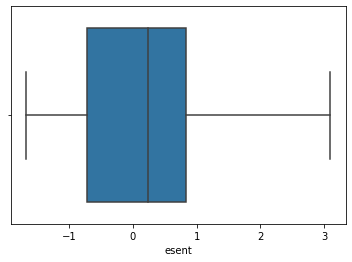

In [127]:
sns.boxplot(x = df.esent)

In [128]:
q1=df["eopenrate"].quantile(0.25)
q3=df["eopenrate"].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
eopenrateout=df[(df["eopenrate"]<lb) | (df["eopenrate"]>ub)]
eopenrateout

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
0,6H6T6N,0.0,2012-09-28,2013-08-11 00:00:00,2013-08-11 00:00:00,0.051619,2.518722,-0.210723,-1.155703,-0.363179,0.0,0.0,0.0,Monday,DEL
27,F3MF5Y,1.0,2010-07-24,2010-07-29 00:00:00,2011-11-28 00:00:00,0.171014,2.518722,0.378839,-0.053193,-0.205201,0.0,0.0,0.0,Thursday,DEL
188,TJJPG,1.0,2011-04-24,2011-05-04 00:00:00,2013-06-26 00:00:00,0.171014,2.518722,1.294766,1.028560,0.090681,1.0,0.0,0.0,Thursday,DEL
195,JJH6BE,0.0,2009-11-24,2010-10-22 00:00:00,2014-01-13 00:00:00,-0.903539,2.518722,3.831179,0.311136,0.020193,1.0,1.0,0.0,Friday,DEL
254,Z265R8,1.0,2011-03-27,2011-08-17 00:00:00,2014-01-15 00:00:00,1.185870,2.518722,3.603665,0.439334,0.291034,1.0,1.0,0.0,Monday,BOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30767,5HEVYW,1.0,2018-01-15,2018-01-15 00:00:00,2018-01-15 00:00:00,-1.381118,2.518722,-0.537087,-0.533023,-0.363179,1.0,0.0,0.0,Wednesday,BOM
30772,WU9W3D,0.0,2018-01-16,2018-01-16 00:00:00,2018-01-16 00:00:00,-1.381118,2.518722,1.355828,-0.752792,-0.363179,1.0,0.0,0.0,Friday,BOM
30774,VL86HD,1.0,2018-01-16,2018-01-16 00:00:00,2018-01-16 00:00:00,-1.321421,2.518722,-0.537087,0.988758,-0.363179,1.0,0.0,0.0,Thursday,DEL
30781,LFV3AA,1.0,2018-01-16,2018-01-16 00:00:00,2018-01-16 00:00:00,-1.381118,2.518722,1.355828,-0.533511,-0.363179,1.0,0.0,0.0,Thursday,MAA


In [129]:
from scipy import stats
z=np.abs(stats.zscore(df["eopenrate"]))
thresh=3
print(np.where(z>thresh))

(array([], dtype=int64),)


In [130]:
df["eopenrate"]=np.where((df["eopenrate"]<lb) | (df["eopenrate"]>ub),df["eopenrate"].median(),df["eopenrate"])

<AxesSubplot:xlabel='eopenrate'>

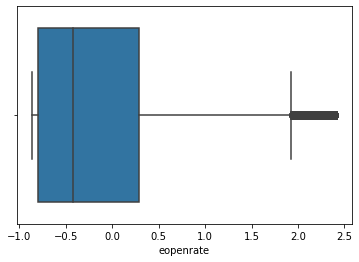

In [131]:
sns.boxplot(x = df.eopenrate)

In [132]:
q1=df["eclickrate"].quantile(0.25)
q3=df["eclickrate"].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
eclickrateout=df[(df["eclickrate"]<lb) | (df["eclickrate"]>ub)]
eclickrateout

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
11,GW8NT7,1.0,2009-11-16,2011-05-09 00:00:00,2014-01-05 00:00:00,0.708291,2.095797,3.721972,0.645918,0.487701,0.0,0.0,0.0,Wednesday,DEL
13,RAQ92T,1.0,2010-03-14,2011-03-01 00:00:00,2013-10-06 00:00:00,0.588896,0.381838,1.704523,1.341121,0.396052,0.0,0.0,0.0,Tuesday,DEL
29,KZHTJ7,1.0,2011-01-26,2011-02-28 00:00:00,2013-12-17 00:00:00,1.245568,0.378204,1.394459,-0.683199,-0.109360,0.0,0.0,0.0,Monday,BOM
69,BXWS2B,1.0,2009-11-29,2011-07-22 00:00:00,2014-01-08 00:00:00,1.006778,1.766855,1.355828,-0.469534,0.255891,1.0,0.0,0.0,Monday,DEL
98,S7B2TP,1.0,2010-09-06,2011-08-21 00:00:00,2011-08-21 00:00:00,0.588896,0.114728,1.206387,-0.176508,-0.363179,0.0,0.0,0.0,Friday,BOM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30788,QX8BEW,1.0,2018-01-17,2018-01-17 00:00:00,2018-01-17 00:00:00,-1.321421,-0.417813,2.617772,-0.528628,-0.363179,1.0,1.0,0.0,Friday,DEL
30792,E75QZC,1.0,2018-01-17,2018-01-17 00:00:00,2018-01-17 00:00:00,-1.261723,2.035379,2.167077,-0.497616,-0.363179,1.0,0.0,0.0,Friday,DEL
30795,ARR7BB,1.0,2018-01-17,2018-01-17 00:00:00,2018-01-17 00:00:00,-1.381118,1.842042,1.355828,0.319194,-0.363179,1.0,0.0,0.0,Friday,DEL
30798,TFQRQP,1.0,2018-01-17,2018-01-17 00:00:00,2018-01-21 00:00:00,-1.202026,1.672872,3.012129,-0.239753,4.445284,1.0,1.0,0.0,Saturday,MAA


In [133]:
from scipy import stats
z=np.abs(stats.zscore(df["eclickrate"]))
thresh=3
print(np.where(z>thresh))

(array([], dtype=int64),)


In [134]:
df["eclickrate"]=np.where((df["eclickrate"]<lb) | (df["eclickrate"]>ub),df["eclickrate"].median(),df["eclickrate"])

In [135]:
q1=df["ordfreq"].quantile(0.25)
q3=df["ordfreq"].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
ordfreqout=df[(df["ordfreq"]<lb) | (df["ordfreq"]>ub)]
ordfreqout

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
1,APCENR,1.0,2010-12-19,2011-04-01 00:00:00,2014-01-19 00:00:00,0.230712,2.269419,0.459184,0.533347,1.383645,1.0,1.0,1.0,Friday,DEL
5,2B6B83,1.0,2008-11-17,2010-10-12 00:00:00,2014-01-14 00:00:00,1.066475,1.856752,0.903174,2.765471,0.994505,1.0,1.0,0.0,Wednesday,DEL
6,99XGVM,1.0,2011-01-24,2011-05-16 00:00:00,2014-01-16 00:00:00,1.902239,0.601463,0.093884,1.335749,0.838937,0.0,1.0,0.0,Friday,BOM
9,3SBQP2,1.0,2010-12-29,2011-02-20 00:00:00,2013-12-10 00:00:00,0.350107,2.319698,0.298022,0.103087,0.923460,1.0,0.0,0.0,Monday,DEL
14,DMJERJ,0.0,2011-04-11,2011-04-14 00:00:00,2014-01-13 00:00:00,-0.724447,-0.441752,-0.537087,-0.063449,0.880801,1.0,1.0,0.0,Tuesday,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30713,UYSRF2,1.0,2018-01-12,2018-01-12 00:00:00,2018-01-20 00:00:00,-1.261723,2.035379,0.814995,2.111291,2.041052,1.0,0.0,0.0,Thursday,BOM
30717,F8RKVV,1.0,2018-01-13,2018-01-13 00:00:00,2018-01-20 00:00:00,-1.022934,0.673232,-0.537087,0.773140,2.384514,1.0,0.0,0.0,Monday,BLR
30737,JYSBDN,1.0,2018-01-14,2018-01-14 00:00:00,2018-01-21 00:00:00,-1.202026,-0.018827,-0.537087,-0.271986,2.384514,1.0,0.0,0.0,Tuesday,DEL
30738,M6DFUK,1.0,2018-01-14,2018-01-14 00:00:00,2018-01-15 00:00:00,-1.082631,0.488683,-0.537087,1.974301,18.870672,1.0,1.0,1.0,Tuesday,MAA


In [136]:
df["ordfreq"]=np.where((df["ordfreq"]<lb) | (df["ordfreq"]>ub),df["ordfreq"].median(),df["ordfreq"])

In [137]:
q1=df["avgorder"].quantile(0.25)
q3=df["avgorder"].quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
avgorderout=df[(df["avgorder"]<lb) | (df["avgorder"]>ub)]
avgorderout

,custid,retained,created,firstorder,lastorder,esent,eopenrate,eclickrate,avgorder,ordfreq,paperless,refill,doorstep,favday,city
5,2B6B83,1.0,2008-11-17,2010-10-12 00:00:00,2014-01-14 00:00:00,1.066475,1.856752,0.903174,2.765471,-0.363179,1.0,1.0,0.0,Wednesday,DEL
12,TFKLD4,1.0,2009-07-25,2010-11-15 00:00:00,2014-01-19 00:00:00,2.439516,-0.766607,-0.262752,1.586286,0.208370,1.0,1.0,1.0,Monday,DEL
16,HEPCW7,0.0,2010-10-02,2011-01-25 00:00:00,2014-01-12 00:00:00,-0.903539,1.217415,0.919001,2.312258,-0.363179,1.0,0.0,0.0,Monday,DEL
37,3TJT3R,1.0,2011-04-22,2011-04-28 00:00:00,2012-01-22 00:00:00,-0.724447,-0.864677,-0.537087,2.542039,-0.291678,0.0,0.0,0.0,Friday,BOM
39,D5SNFS,0.0,2011-01-04,2011-04-13 00:00:00,2013-10-06 00:00:00,-1.679605,-0.864677,-0.537087,2.847030,0.071544,0.0,0.0,0.0,Wednesday,DEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30658,A832F6,1.0,2018-01-09,2018-01-17 00:00:00,2018-01-18 00:00:00,-1.261723,-0.381334,0.814995,2.418235,-0.363179,1.0,1.0,0.0,Friday,DEL
30664,CF24CP,1.0,2018-01-10,2018-01-10 00:00:00,2018-01-10 00:00:00,-1.022934,0.980813,-0.537087,5.730404,-0.363179,1.0,0.0,0.0,Friday,MAA
30713,UYSRF2,1.0,2018-01-12,2018-01-12 00:00:00,2018-01-20 00:00:00,-1.261723,2.035379,0.814995,2.111291,-0.363179,1.0,0.0,0.0,Thursday,BOM
30738,M6DFUK,1.0,2018-01-14,2018-01-14 00:00:00,2018-01-15 00:00:00,-1.082631,0.488683,-0.537087,1.974301,-0.363179,1.0,1.0,1.0,Tuesday,MAA


In [138]:
df["avgorder"]=np.where((df["avgorder"]<lb) | (df["avgorder"]>ub),df["avgorder"].median(),df["avgorder"])

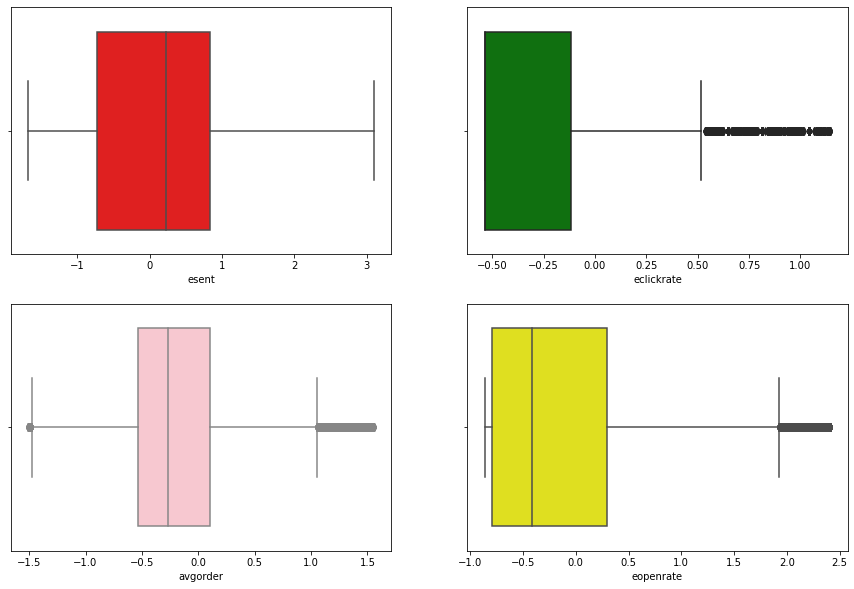

In [140]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x = df.esent,color='red');
plt.subplot(2,2,2)
sns.boxplot(x = df.eclickrate,color='green')
plt.subplot(2,2,3)
sns.boxplot(x = df.avgorder,color='pink')
plt.subplot(2,2,4)
sns.boxplot(x = df.eopenrate,color='yellow')
plt.show()